# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Defining Mean Parameters

In [3]:
eps = 0.005 # convergence factor

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters:
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
false_dens = 1.0/6.0
lvl_dens = [(1-eps)/4.3166, eps/4.3166]
gn2m  = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = TAZ.Spingroup.zip(l, j)
reaction2 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

# 1 Spingroup Case:
SGs = TAZ.Spingroup.zip(l[:1], j[:1])
reaction1 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens[:1], gn2m=gn2m[:1], nDOF=dfn[:1], gg2m=gg2m[:1], gDOF=dfg[:1], spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction1)
distributions = reaction1.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior, verbose=True)
Posterior_1 = runMaster.WigBayes()

Finding level-spacing probabilities for group 0.
Creating ENCORE pipeline.
Finished ENCORE initialization.


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction2)
distributions = reaction2.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior, verbose=True)
Posterior_2 = runMaster.WigBayes()

Finding level-spacing probabilities for group 0.
Finding level-spacing probabilities for group 1.
Creating ENCORE pipeline.
Finished ENCORE initialization.


### Comparison

Average Error for True Probability  = 0.00082
Average Error for False Probability = 0.00217



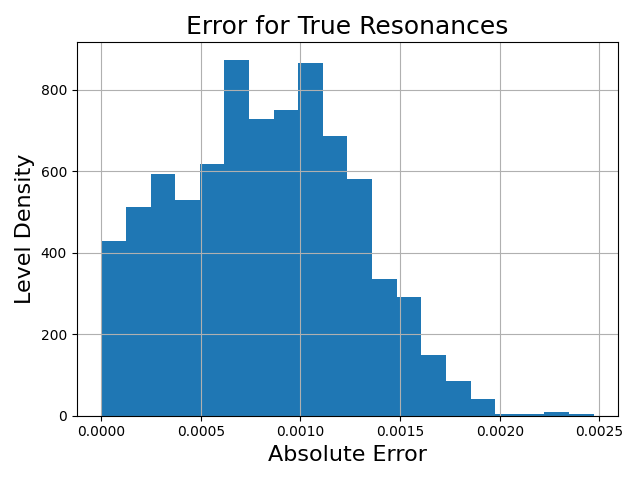

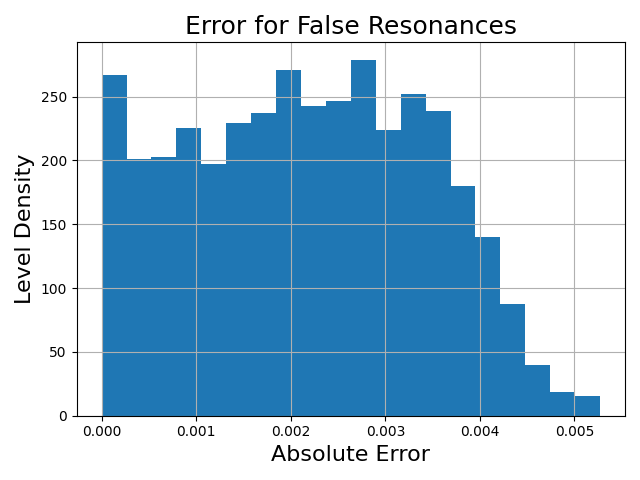

In [7]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [8]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.748131 0.747535]
 [0.520999 0.520294]
 [0.400618 0.400045]
 [0.316462 0.316021]
 [0.31848  0.317754]
 [0.424419 0.423485]
 [0.627676 0.625921]
 [0.485752 0.486729]
 [0.610061 0.608554]
 ...
 [0.629034 0.627937]
 [0.469746 0.468826]
 [0.394052 0.393486]
 [0.422524 0.421935]
 [0.898505 0.897847]
 [0.524726 0.52367 ]
 [0.529881 0.530143]
 [0.714323 0.71324 ]
 [0.70007  0.69873 ]]

False Spingroup Posterior:
[[0.251869 0.251157]
 [0.479001 0.477107]
 [0.599382 0.596608]
 [0.683538 0.679487]
 [0.68152  0.677223]
 [0.575581 0.572453]
 [0.372324 0.371316]
 [0.514248 0.511673]
 [0.389939 0.388873]
 ...
 [0.370966 0.36943 ]
 [0.530254 0.527377]
 [0.605948 0.601679]
 [0.577476 0.573532]
 [0.101495 0.101365]
 [0.475274 0.472908]
 [0.470119 0.467335]
 [0.285677 0.284573]
 [0.29993  0.298871]]
